# Proyek Akhir : Menyelesaikan Permasalahan Perusahaan Edutech - Abdul Rafar

- **Nama:** Abdul Rafar  
- **Email:** a671ybf003@devacademy.id  
- **ID Dicoding:** abdul_rafar_1oFX  

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


### Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv('data.csv', delimiter=';')

## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
# Jumlah missing value per kolom
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# Jumlah baris duplikat
print(f"\nJumlah baris duplikat: {df.duplicated().sum()}")

# Menampilkan nama-nama kolom
print("\nNama-nama kolom:")
print(df.columns.tolist())

# Distribusi nilai pada kolom target (Status)
print("\nDistribusi kolom Status:")
print(df['Status'].value_counts())

# Jumlah nilai unik di setiap kolom
print("\nJumlah nilai unik per kolom:")
print(df.nunique())


Jumlah missing value per kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment

## Data Preparation / Preprocessing

In [7]:
data_prep = df.copy()

In [8]:
categorical_cols = data_prep.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Status')

In [9]:
# Encode semua kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    data_prep[col] = le.fit_transform(data_prep[col])

# Encode kolom target (Status)
data_prep['Status'] = data_prep['Status'].map({'Dropout': 1, 'Enrolled': 0, 'Graduate': 0})


In [10]:
X = data_prep.drop('Status', axis=1)
y = data_prep['Status']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.8858757062146893
Confusion Matrix:
 [[575  26]
 [ 75 209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.89      0.74      0.81       284

    accuracy                           0.89       885
   macro avg       0.89      0.85      0.86       885
weighted avg       0.89      0.89      0.88       885


Random Forest
Accuracy: 0.8745762711864407
Confusion Matrix:
 [[566  35]
 [ 76 208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       601
           1       0.86      0.73      0.79       284

    accuracy                           0.87       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885


Decision Tree
Accuracy: 0.784180790960452
Confusion Matrix:
 [[497 104]
 [ 87 197]]
Classification Report:
            

## Evaluation

=== Logistic Regression ===
Accuracy: 0.8859


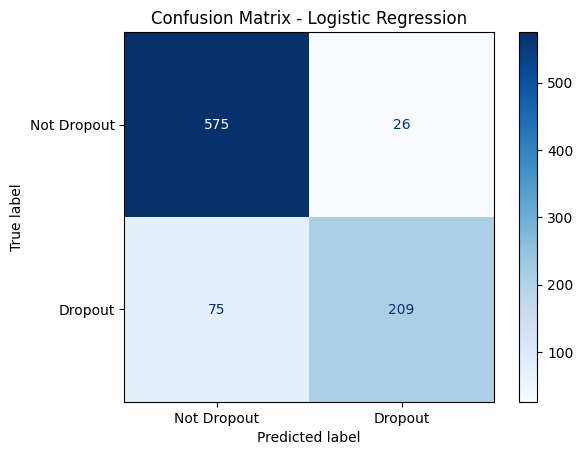

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.88      0.96      0.92       601
     Dropout       0.89      0.74      0.81       284

    accuracy                           0.89       885
   macro avg       0.89      0.85      0.86       885
weighted avg       0.89      0.89      0.88       885



=== Random Forest ===
Accuracy: 0.8847


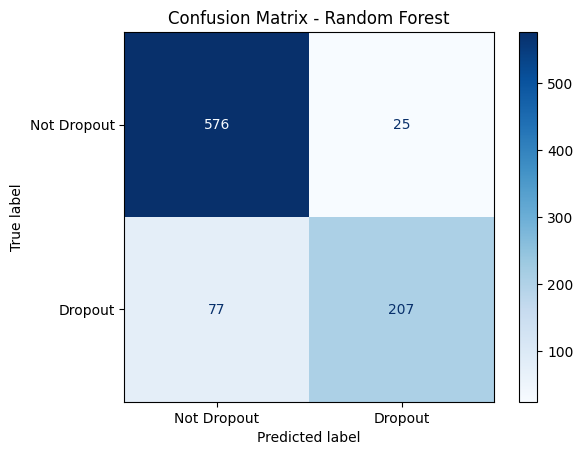

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.88      0.96      0.92       601
     Dropout       0.89      0.73      0.80       284

    accuracy                           0.88       885
   macro avg       0.89      0.84      0.86       885
weighted avg       0.89      0.88      0.88       885



=== Decision Tree ===
Accuracy: 0.7955


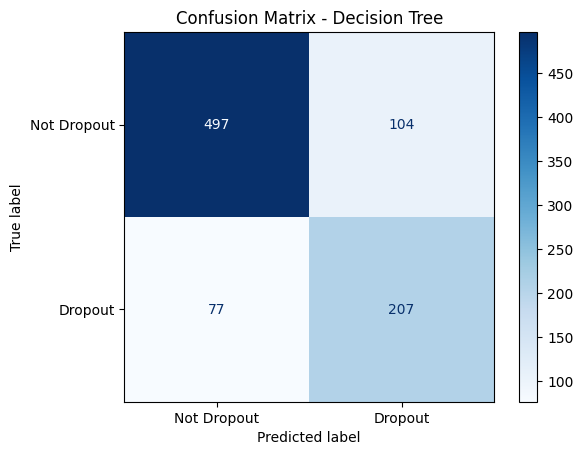

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.87      0.83      0.85       601
     Dropout       0.67      0.73      0.70       284

    accuracy                           0.80       885
   macro avg       0.77      0.78      0.77       885
weighted avg       0.80      0.80      0.80       885



=== SVM ===
Accuracy: 0.8701


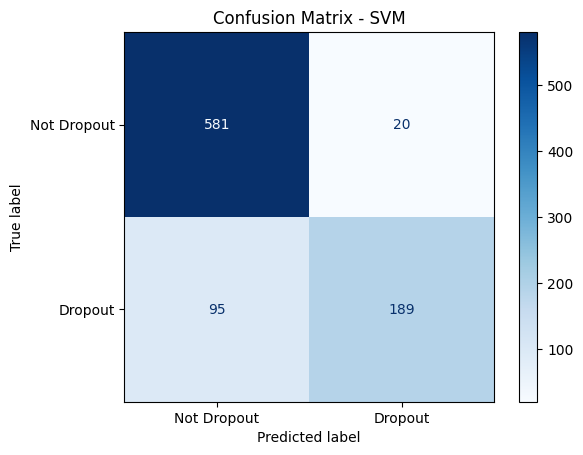

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.86      0.97      0.91       601
     Dropout       0.90      0.67      0.77       284

    accuracy                           0.87       885
   macro avg       0.88      0.82      0.84       885
weighted avg       0.87      0.87      0.86       885



=== Naive Bayes ===
Accuracy: 0.8294


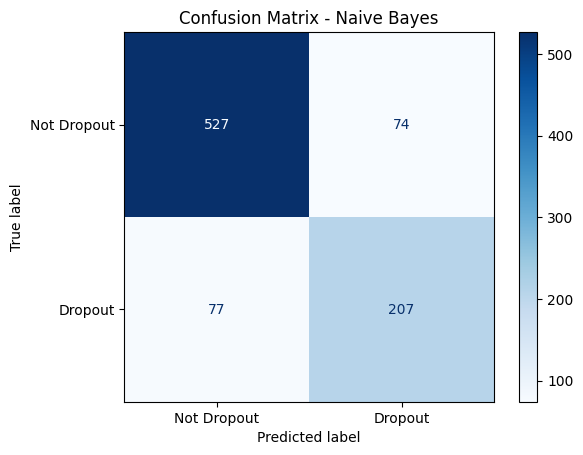

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.87      0.88      0.87       601
     Dropout       0.74      0.73      0.73       284

    accuracy                           0.83       885
   macro avg       0.80      0.80      0.80       885
weighted avg       0.83      0.83      0.83       885



=== KNN ===
Accuracy: 0.8373


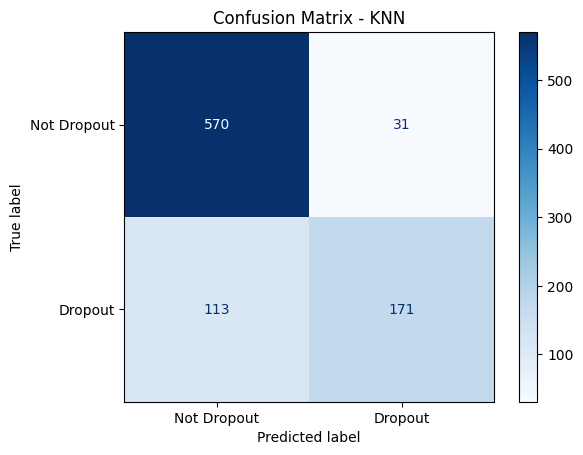

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.83      0.95      0.89       601
     Dropout       0.85      0.60      0.70       284

    accuracy                           0.84       885
   macro avg       0.84      0.78      0.80       885
weighted avg       0.84      0.84      0.83       885





In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {"model": model, "y_pred": y_pred}

for name, result in results.items():
    print(f"=== {name} ===")

    y_pred = result["y_pred"]

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Dropout', 'Dropout'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Dropout', 'Dropout']))
    print("\n" + "="*60 + "\n")


In [20]:
data_prep.to_csv('data_bersih.csv', index=False)
